In [132]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

# Import dataset and preprocessing 

In [133]:
os.chdir("../2_Data")

In [134]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [135]:
df1['matchness'] = df1["matchness"].map(dict(mismatch=0, match=1))
df1['rt'] = np.log(df1['rt'])
df2['matchness'] = df2["matchness"].map(dict(mismatch=0, match=1))
df2['rt'] = np.log(df2['rt'])

In [136]:
df1.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,434.97,psychophysics,6.773080,f,f,image_first,f,True,三角,img/C_ambi40.png,circle,triangle,1,exp1,0,1
1,1,0,2000,5,434.97,psychophysics,6.507278,j,j,image_first,j,True,圆形,img/C_ambi40.png,circle,circle,1,exp1,1,2
2,1,0,2000,5,434.97,psychophysics,6.386879,j,j,image_first,j,True,三角,img/T_ambi40.png,triangle,triangle,1,exp1,1,3
3,1,0,2000,5,434.97,psychophysics,6.469250,f,f,image_first,f,True,圆形,img/S_ambi40.png,square,circle,1,exp1,0,4
4,1,0,2000,5,434.97,psychophysics,6.350886,j,j,image_first,j,True,方形,img/S_ambi40.png,square,square,1,exp1,1,5


In [137]:
df2.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,408.81,psychophysics,6.711740,f,f,image_first,f,True,常人,img/S_ambi40.png,square,Neutral,1,exp2,0,1
1,1,0,2000,5,408.81,psychophysics,6.608001,f,f,image_first,f,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,0,2
2,1,0,2000,5,408.81,psychophysics,6.660575,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,3
3,1,0,2000,5,408.81,psychophysics,6.526495,f,f,image_first,f,True,坏人,img/C_ambi40.png,circle,Bad,1,exp2,0,4
4,1,0,2000,5,408.81,psychophysics,6.395262,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,5


## 7-trial back to both Exp1 and Exp2 data

In [138]:
save_df1 = pd.DataFrame() # 设置一个空DataFrame
group = df1.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df1 = pd.concat((save_df1, op_group)) # 将每次的结果与save_df合并起来


In [139]:
save_df1.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,434.97,psychophysics,6.352629,j,j,image_first,...,1.0,1.0,1.0,square,triangle,square,circle,triangle,circle,triangle
8,1,0,2000,5,434.97,psychophysics,6.415097,f,f,image_first,...,1.0,1.0,1.0,square,square,triangle,square,circle,triangle,circle
9,1,0,2000,5,434.97,psychophysics,6.519147,f,f,image_first,...,1.0,1.0,1.0,square,square,square,triangle,square,circle,triangle
10,1,0,2000,5,434.97,psychophysics,6.359574,j,j,image_first,...,1.0,1.0,1.0,circle,square,square,square,triangle,square,circle
11,1,0,2000,5,434.97,psychophysics,6.350886,f,f,image_first,...,1.0,1.0,1.0,circle,circle,square,square,square,triangle,square
12,1,0,2000,5,434.97,psychophysics,6.345636,j,j,image_first,...,1.0,1.0,1.0,triangle,circle,circle,square,square,square,triangle
13,1,0,2000,5,434.97,psychophysics,6.322565,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,circle,circle,square,square,square
14,1,0,2000,5,434.97,psychophysics,6.320768,f,f,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,circle,circle,square,square
15,1,0,2000,5,434.97,psychophysics,6.324359,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,triangle,circle,circle,square
16,1,0,2000,5,434.97,psychophysics,6.516193,f,f,image_first,...,1.0,1.0,1.0,circle,triangle,triangle,triangle,triangle,circle,circle


In [140]:
save_df2 = pd.DataFrame() # 设置一个空DataFrame
group2 = df2.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group2:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df2 = pd.concat((save_df2, op_group)) # 将每次的结果与save_df合并起来


In [141]:
save_df2.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,408.81,psychophysics,6.584791,f,f,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Neutral,Good,Neutral
8,1,0,2000,5,408.81,psychophysics,6.822197,j,j,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Neutral,Bad,Neutral,Good
9,1,0,2000,5,408.81,psychophysics,6.594413,f,f,image_first,...,1.0,1.0,1.0,Good,Neutral,Bad,Good,Neutral,Bad,Neutral
10,1,0,2000,5,408.81,psychophysics,6.434547,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Good,Neutral,Bad
11,1,0,2000,5,408.81,psychophysics,6.424869,j,j,image_first,...,1.0,1.0,1.0,Bad,Bad,Good,Neutral,Bad,Good,Neutral
12,1,0,2000,5,408.81,psychophysics,6.342121,j,j,image_first,...,1.0,1.0,1.0,Good,Bad,Bad,Good,Neutral,Bad,Good
13,1,0,2000,5,408.81,psychophysics,6.486161,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Bad,Bad,Good,Neutral,Bad
14,1,0,2000,5,408.81,psychophysics,6.562444,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Good,Bad,Bad,Good,Neutral
15,1,0,2000,5,408.81,psychophysics,6.274762,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Good,Good,Bad,Bad,Good
16,1,0,2000,5,408.81,psychophysics,6.678342,f,f,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Good,Good,Bad,Bad


In [142]:
exp1 = save_df1
exp2 = save_df2

## Basic information

In [143]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27218 non-null  int64  
 1   gender            27218 non-null  int64  
 2   year              27218 non-null  int64  
 3   education         27218 non-null  int64  
 4   dist              27218 non-null  float64
 5   trial_type        27218 non-null  object 
 6   rt                27218 non-null  float64
 7   response          27218 non-null  object 
 8   key_press         27218 non-null  object 
 9   condition         27218 non-null  object 
 10  correct_response  27218 non-null  object 
 11  correct           27218 non-null  bool   
 12  word              27218 non-null  object 
 13  Image             27218 non-null  object 
 14  shape_en          27218 non-null  object 
 15  valence           27218 non-null  object 
 16  ACC               27218 non-null  int64 

In [144]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27142 non-null  int64  
 1   gender            27142 non-null  int64  
 2   year              27142 non-null  int64  
 3   education         27142 non-null  int64  
 4   dist              27142 non-null  float64
 5   trial_type        27142 non-null  object 
 6   rt                27142 non-null  float64
 7   response          27142 non-null  object 
 8   key_press         27142 non-null  object 
 9   condition         27142 non-null  object 
 10  correct_response  27142 non-null  object 
 11  correct           27142 non-null  bool   
 12  word              27142 non-null  object 
 13  Image             27142 non-null  object 
 14  shape_en          27142 non-null  object 
 15  valence           27142 non-null  object 
 16  ACC               27142 non-null  int64 

There is no Na in datasets

<AxesSubplot: >

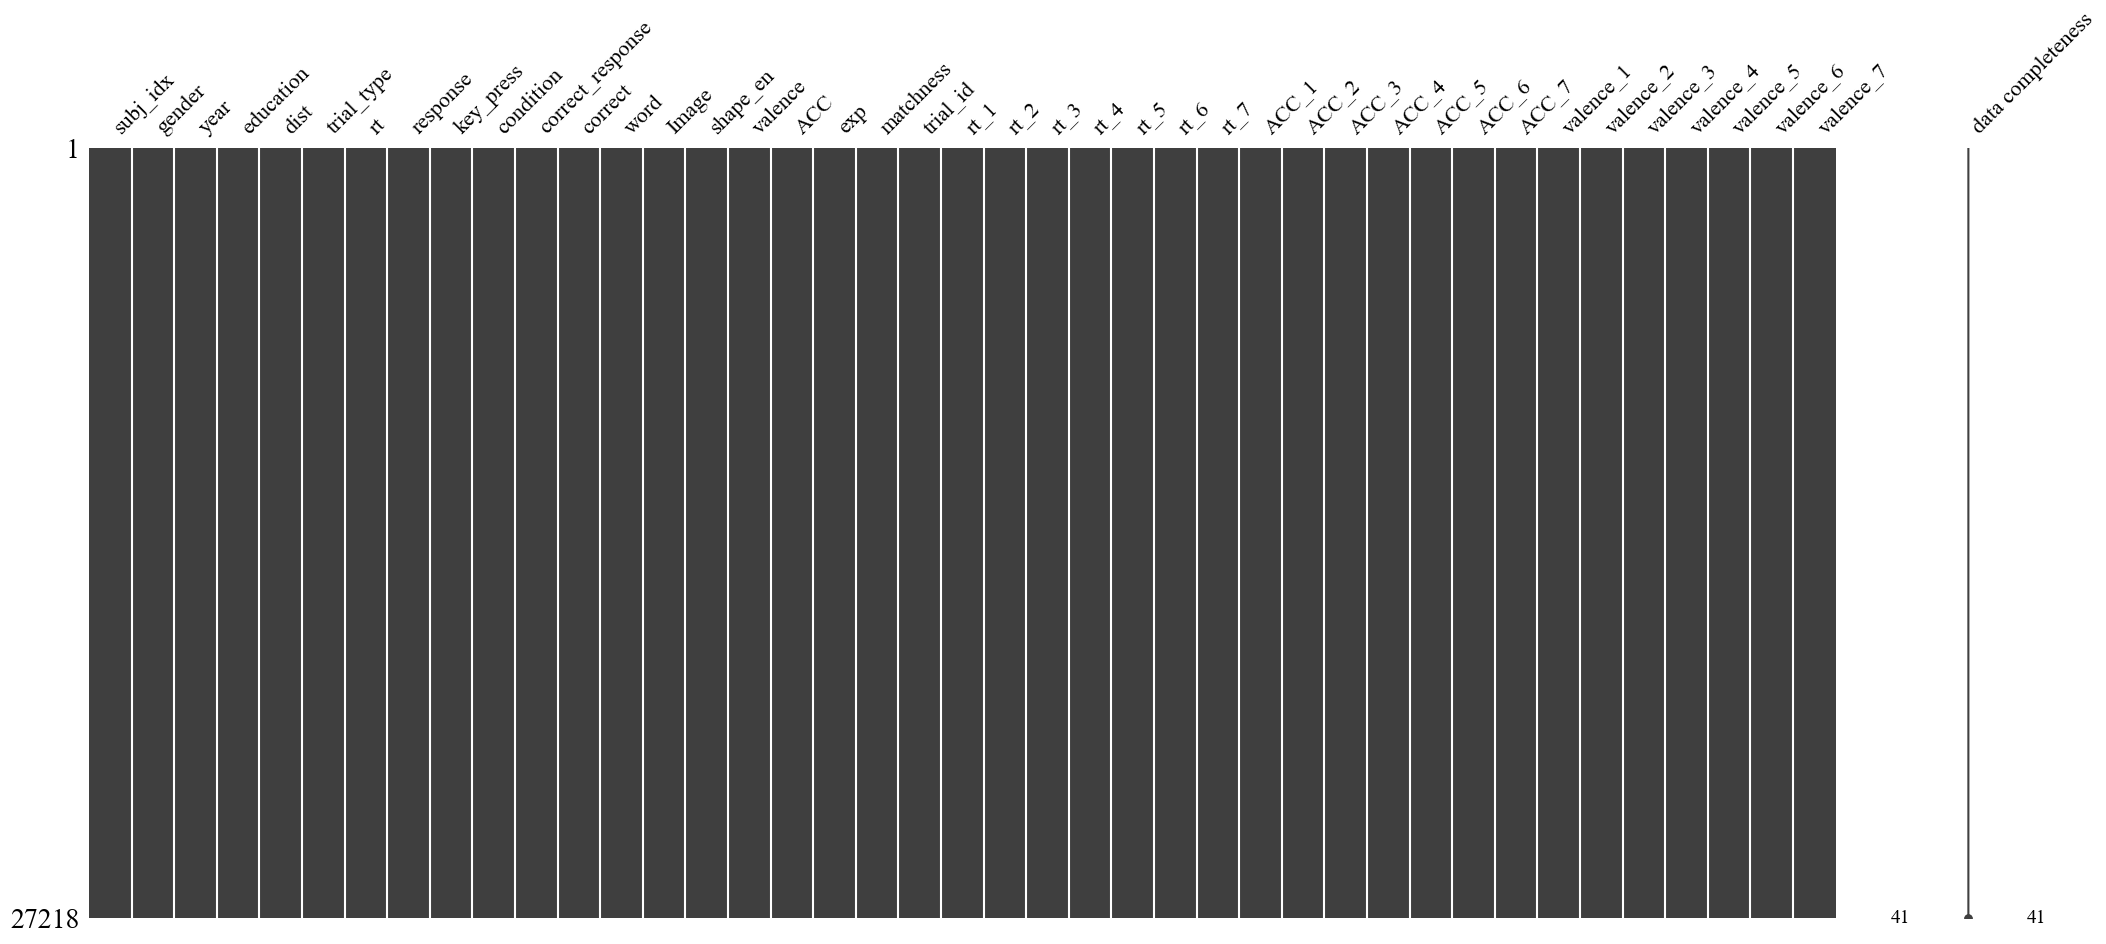

In [145]:
msno.matrix(exp1, labels=True)

<AxesSubplot: >

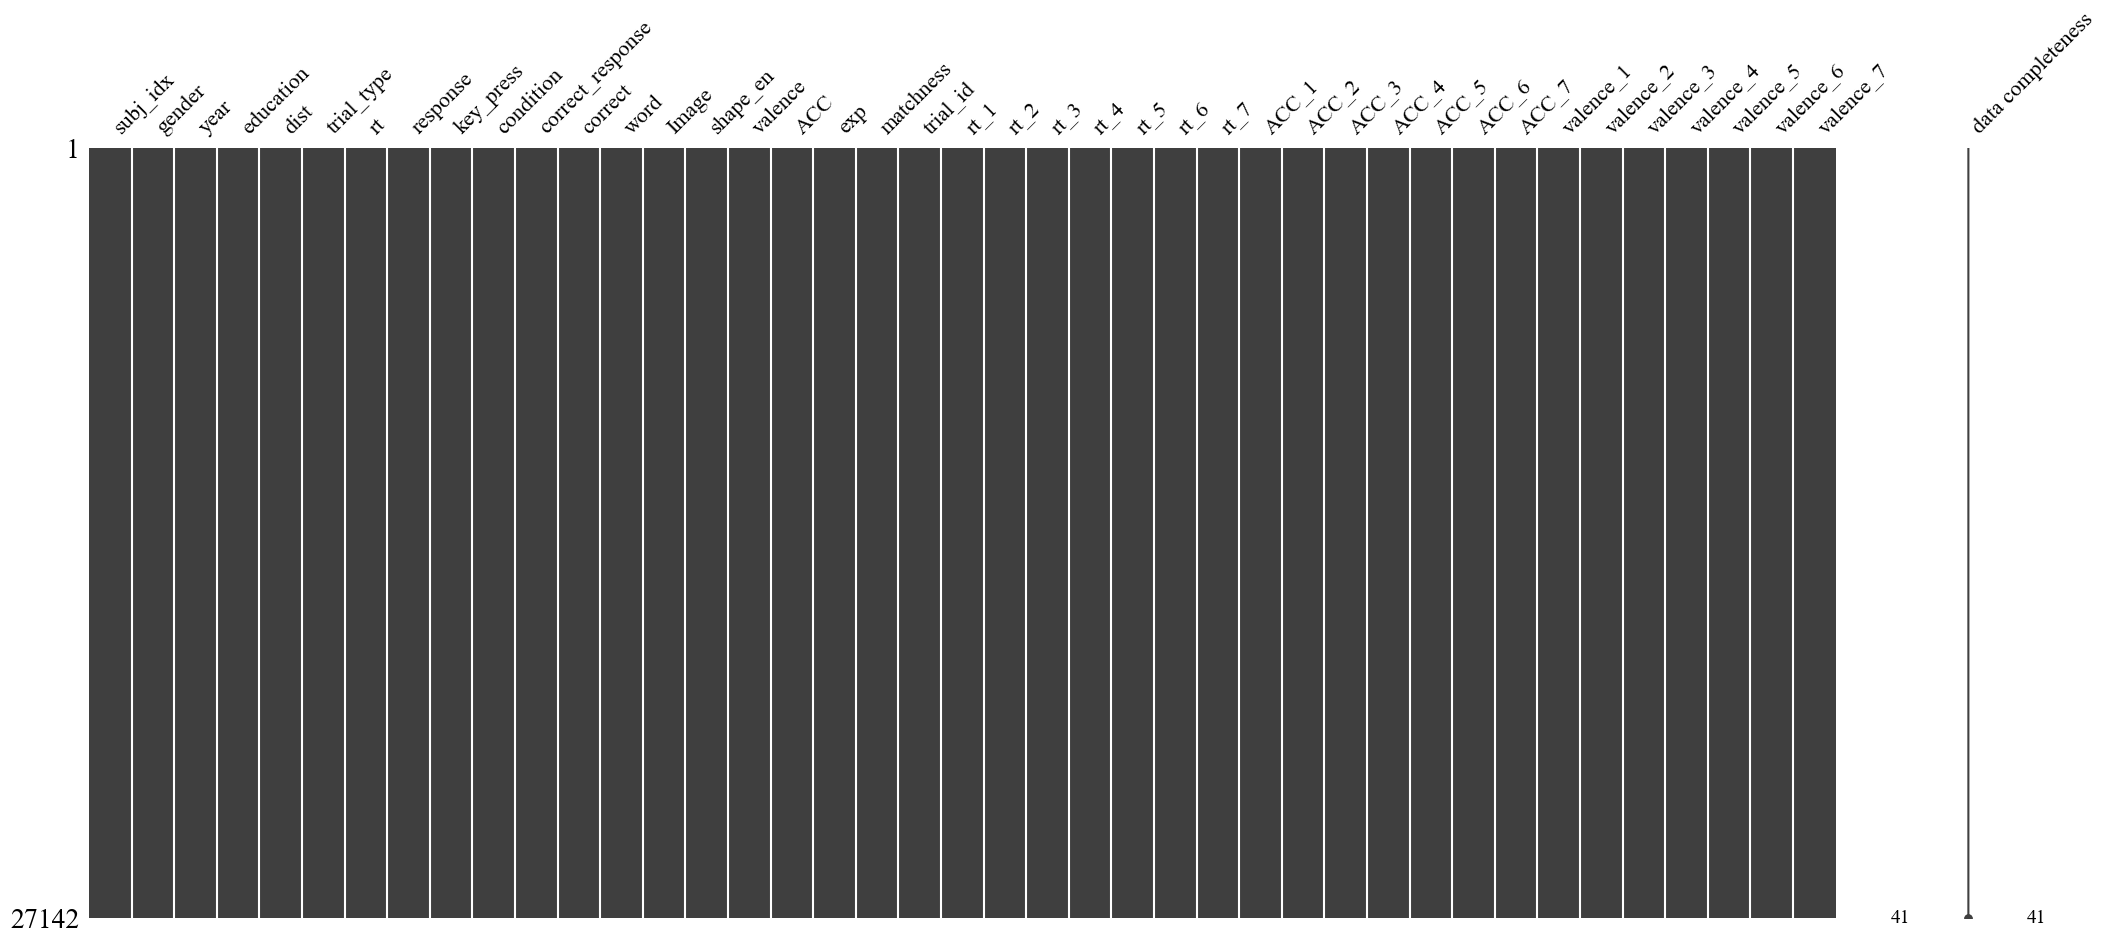

In [146]:
msno.matrix(exp2, labels=True)

One hot coding

In [147]:
onehot_v1 = pd.get_dummies(exp1[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [148]:
exp1 = pd.concat([exp1, onehot_v1], axis=1)

In [149]:
exp1 = exp1.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [150]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subj_idx            27218 non-null  int64  
 1   gender              27218 non-null  int64  
 2   year                27218 non-null  int64  
 3   education           27218 non-null  int64  
 4   dist                27218 non-null  float64
 5   trial_type          27218 non-null  object 
 6   rt                  27218 non-null  float64
 7   response            27218 non-null  object 
 8   key_press           27218 non-null  object 
 9   condition           27218 non-null  object 
 10  correct_response    27218 non-null  object 
 11  correct             27218 non-null  bool   
 12  word                27218 non-null  object 
 13  Image               27218 non-null  object 
 14  shape_en            27218 non-null  object 
 15  ACC                 27218 non-null  int64  
 16  exp 

In [151]:
exp1.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,valence_4_triangle,valence_5_circle,valence_5_square,valence_5_triangle,valence_6_circle,valence_6_square,valence_6_triangle,valence_7_circle,valence_7_square,valence_7_triangle
7,1,0,2000,5,434.97,psychophysics,6.352629,j,j,image_first,...,0,0,0,1,1,0,0,0,0,1
8,1,0,2000,5,434.97,psychophysics,6.415097,f,f,image_first,...,0,1,0,0,0,0,1,1,0,0
9,1,0,2000,5,434.97,psychophysics,6.519147,f,f,image_first,...,1,0,1,0,1,0,0,0,0,1
10,1,0,2000,5,434.97,psychophysics,6.359574,j,j,image_first,...,0,0,0,1,0,1,0,1,0,0
11,1,0,2000,5,434.97,psychophysics,6.350886,f,f,image_first,...,0,0,1,0,0,0,1,0,1,0
12,1,0,2000,5,434.97,psychophysics,6.345636,j,j,image_first,...,0,0,1,0,0,1,0,0,0,1
13,1,0,2000,5,434.97,psychophysics,6.322565,j,j,image_first,...,0,0,1,0,0,1,0,0,1,0
14,1,0,2000,5,434.97,psychophysics,6.320768,f,f,image_first,...,0,1,0,0,0,1,0,0,1,0
15,1,0,2000,5,434.97,psychophysics,6.324359,j,j,image_first,...,1,1,0,0,1,0,0,0,1,0
16,1,0,2000,5,434.97,psychophysics,6.516193,f,f,image_first,...,1,0,0,1,1,0,0,1,0,0


In [152]:
onehot_v2 = pd.get_dummies(exp2[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [153]:
exp2 = pd.concat([exp2, onehot_v2], axis=1)

In [154]:
exp2 = exp2.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [155]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subj_idx           27142 non-null  int64  
 1   gender             27142 non-null  int64  
 2   year               27142 non-null  int64  
 3   education          27142 non-null  int64  
 4   dist               27142 non-null  float64
 5   trial_type         27142 non-null  object 
 6   rt                 27142 non-null  float64
 7   response           27142 non-null  object 
 8   key_press          27142 non-null  object 
 9   condition          27142 non-null  object 
 10  correct_response   27142 non-null  object 
 11  correct            27142 non-null  bool   
 12  word               27142 non-null  object 
 13  Image              27142 non-null  object 
 14  shape_en           27142 non-null  object 
 15  ACC                27142 non-null  int64  
 16  exp                271

In [156]:
exp2.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,valence_4_Neutral,valence_5_Bad,valence_5_Good,valence_5_Neutral,valence_6_Bad,valence_6_Good,valence_6_Neutral,valence_7_Bad,valence_7_Good,valence_7_Neutral
7,1,0,2000,5,408.81,psychophysics,6.584791,f,f,image_first,...,0,0,0,1,0,1,0,0,0,1
8,1,0,2000,5,408.81,psychophysics,6.822197,j,j,image_first,...,1,1,0,0,0,0,1,0,1,0
9,1,0,2000,5,408.81,psychophysics,6.594413,f,f,image_first,...,0,0,0,1,1,0,0,0,0,1
10,1,0,2000,5,408.81,psychophysics,6.434547,j,j,image_first,...,0,0,1,0,0,0,1,1,0,0
11,1,0,2000,5,408.81,psychophysics,6.424869,j,j,image_first,...,1,1,0,0,0,1,0,0,0,1
12,1,0,2000,5,408.81,psychophysics,6.342121,j,j,image_first,...,0,0,0,1,1,0,0,0,1,0
13,1,0,2000,5,408.81,psychophysics,6.486161,f,f,image_first,...,0,0,1,0,0,0,1,1,0,0
14,1,0,2000,5,408.81,psychophysics,6.562444,f,f,image_first,...,0,1,0,0,0,1,0,0,0,1
15,1,0,2000,5,408.81,psychophysics,6.274762,j,j,image_first,...,0,1,0,0,1,0,0,0,1,0
16,1,0,2000,5,408.81,psychophysics,6.678342,f,f,image_first,...,0,0,1,0,1,0,0,1,0,0


## Split the data by presentation(condition)

### Exp1

In [157]:
df1_sim = exp1[exp1.condition == "simultaneous"]
df1_word = exp1[exp1.condition == "word_first"]
df1_img = exp1[exp1.condition == "image_first"]

In [158]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values

#### feature

In [159]:
X1_sim = df1_sim[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_word = df1_word[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_img = df1_img[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values


1 back trial feature

In [160]:
X1_sim1 = df1_sim[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square"]].values
X1_word1 = df1_word[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square"]].values
X1_img1 = df1_img[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square"]].values


2 back trial feature

In [161]:
X1_sim2 = df1_sim[['rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square"]].values
X1_word2 = df1_word[['rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square"]].values
X1_img2 = df1_img[['rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square"]].values


3 back trial feature

In [162]:
X1_sim3 = df1_sim[['rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square"]].values
X1_word3 = df1_word[['rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square"]].values
X1_img3 = df1_img[['rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square"]].values


4 back trial

In [163]:
X1_sim4 = df1_sim[['rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square"]].values
X1_word4 = df1_word[['rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square"]].values
X1_img4 = df1_img[['rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square"]].values


5 back trial

In [164]:
X1_sim5 = df1_sim[['rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square"]].values
X1_word5 = df1_word[['rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square"]].values
X1_img5 = df1_img[['rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square"]].values


6 back trial feature

In [165]:
X1_sim6 = df1_sim[['rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square"]].values
X1_word6 = df1_word[['rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square"]].values
X1_img6 = df1_img[['rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square"]].values


7 back trial feature

In [166]:
X1_sim7 = df1_sim[['rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X1_word7 = df1_word[['rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X1_img7 = df1_img[['rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values


### Exp2

In [167]:
df2_sim = exp2[exp2.condition == "simultaneous"]
df2_word = exp2[exp2.condition == "word_first"]
df2_img = exp2[exp2.condition == "image_first"]

In [168]:
y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

#### feature

In [169]:
X2_sim = df2_sim[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_word = df2_word[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_img = df2_img[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values


1 back trial

In [170]:
X2_sim1 = df2_sim[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good"]].values
X2_word1 = df2_word[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good"]].values
X2_img1 = df2_img[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good"]].values


2 back trial

In [171]:
X2_sim2 = df2_sim[['rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good"]].values
X2_word2 = df2_word[['rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good"]].values
X2_img2 = df2_img[['rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good"]].values


3 back trial

In [172]:
X2_sim3 = df2_sim[['rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good"]].values
X2_word3 = df2_word[['rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good"]].values
X2_img3 = df2_img[['rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good"]].values


4 back trial

In [173]:
X2_sim4 = df2_sim[['rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good"]].values
X2_word4 = df2_word[['rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good"]].values
X2_img4 = df2_img[['rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good"]].values


5 back

In [174]:
X2_sim5 = df2_sim[['rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good"]].values
X2_word5 = df2_word[['rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good"]].values
X2_img5 = df2_img[['rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good"]].values


6 back

In [175]:
X2_sim6 = df2_sim[['rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good"]].values
X2_word6 = df2_word[['rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good"]].values
X2_img6 = df2_img[['rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good"]].values


7 back

In [176]:
X2_sim7 = df2_sim[['rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values
X2_word7 = df2_word[['rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values
X2_img7 = df2_img[['rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values


# Cross stimuli presentation

split exp1 and exp2 respectively into three data(base on presentation, simultaneous; word_fitst; image_first)

## Exp1

### Current trial

In [177]:
groups_sim = df1_sim["subj_idx"].values
logo = LeaveOneGroupOut()

roc_auc_img1_0 = []
roc_auc_word1_0 = []
roc_auc_sim1_0 = []

for train, test in logo.split(X1_sim, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim[train], y=y1_sim[train])
    y_pre_sim = logi1.predict_proba(X1_sim[test])
    score_sim1 = roc_auc_score(y1_sim[test], y_pre_sim[:, -1])
    y_pred_img = logi1.predict_proba(X1_img[df1_img["subj_idx"] == test_sub])
    score_img1 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img[:, -1])
    y_pred_word = logi1.predict_proba(X1_word[df1_word["subj_idx"] == test_sub])
    score_word1 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word[:, -1])
    roc_auc_sim1_0.append(score_sim1)
    roc_auc_img1_0.append(score_img1)
    roc_auc_word1_0.append(score_word1)

In [178]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_0))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_0))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_0))

The mean roc auc score of image_first is 0.6201175701727403
The mean roc auc score of simultaneous is 0.6180811723224645
The mean roc auc score of word_first is 0.6033211821221353


In [179]:
T_0 = pd.DataFrame({"Image_first":roc_auc_img1_0, "Simultaneous":roc_auc_sim1_0, "Word_first":roc_auc_word1_0, "Trial_back":0})

In [180]:
T_0 = pd.melt(T_0, id_vars=['Trial_back'])

In [181]:
T_0.head()

,Trial_back,variable,value
0,0,Image_first,0.788498
1,0,Image_first,0.693892
2,0,Image_first,0.621260
3,0,Image_first,0.629993
4,0,Image_first,0.850641


<AxesSubplot: xlabel='variable', ylabel='value'>

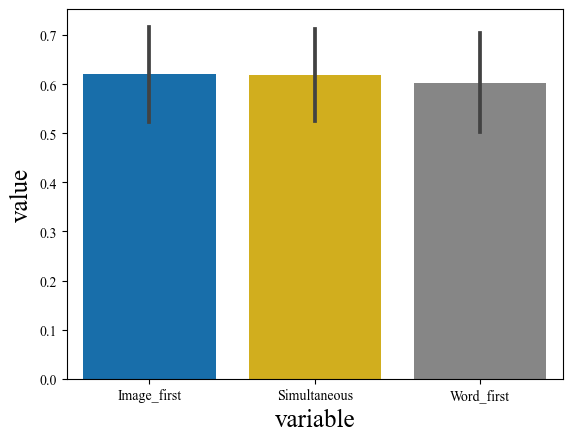

In [182]:
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams["axes.labelsize"] = 18
palette=['#0073C2FF','#EFC000FF','#868686FF']
sns.barplot(x="variable", y = "value", data=T_0, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 1 back

In [183]:
roc_auc_img1_1 = []
roc_auc_word1_1 = []
roc_auc_sim1_1 = []

for train, test in logo.split(X1_sim1, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim1[train], y=y1_sim[train])
    y_pre_sim1_1 = logi1.predict_proba(X1_sim1[test])
    score_sim1_1 = roc_auc_score(y1_sim[test], y_pre_sim1_1[:, -1])
    y_pred_img_1 = logi1.predict_proba(X1_img1[df1_img["subj_idx"] == test_sub])
    score_img1_1 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_1[:, -1])
    y_pred_word_1 = logi1.predict_proba(X1_word1[df1_word["subj_idx"] == test_sub])
    score_word1_1 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_1[:, -1])
    roc_auc_sim1_1.append(score_sim1_1)
    roc_auc_img1_1.append(score_img1_1)
    roc_auc_word1_1.append(score_word1_1)

In [184]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_1))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_1))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_1))

The mean roc auc score of image_first is 0.5097749023450595
The mean roc auc score of simultaneous is 0.503850954707271
The mean roc auc score of word_first is 0.5227703998726321


In [185]:
T_1 = pd.DataFrame({"Image_first":roc_auc_img1_1, "Simultaneous":roc_auc_sim1_1, "Word_first":roc_auc_word1_1, "Trial_back":1})

In [186]:
T_1 = pd.melt(T_1, id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

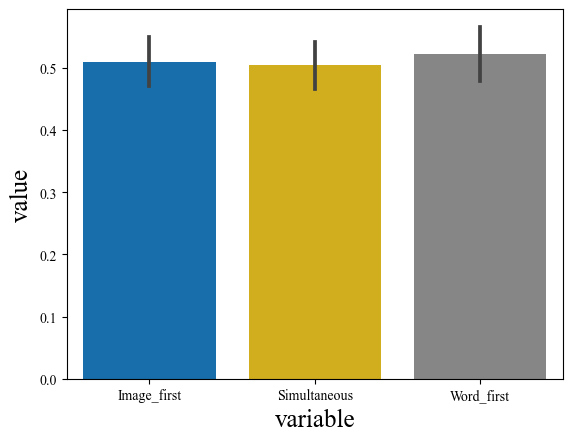

In [187]:
sns.barplot(x="variable", y = "value", data=T_1, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 2 back

In [188]:
roc_auc_img1_2 = []
roc_auc_word1_2 = []
roc_auc_sim1_2 = []

for train, test in logo.split(X1_sim2, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim2[train], y=y1_sim[train])
    y_pre_sim1_2 = logi1.predict_proba(X1_sim2[test])
    score_sim1_2 = roc_auc_score(y1_sim[test], y_pre_sim1_2[:, -1])
    y_pred_img_2 = logi1.predict_proba(X1_img2[df1_img["subj_idx"] == test_sub])
    score_img1_2 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_2[:, -1])
    y_pred_word_2 = logi1.predict_proba(X1_word2[df1_word["subj_idx"] == test_sub])
    score_word1_2 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_2[:, -1])
    roc_auc_sim1_2.append(score_sim1_2)
    roc_auc_img1_2.append(score_img1_2)
    roc_auc_word1_2.append(score_word1_2)

In [189]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_2))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_2))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_2))

The mean roc auc score of image_first is 0.5156500731434746
The mean roc auc score of simultaneous is 0.5107429987158355
The mean roc auc score of word_first is 0.5155296600513013


In [190]:
T_2 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_2, "Simultaneous":roc_auc_sim1_2, "Word_first":roc_auc_word1_2, "Trial_back":2}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

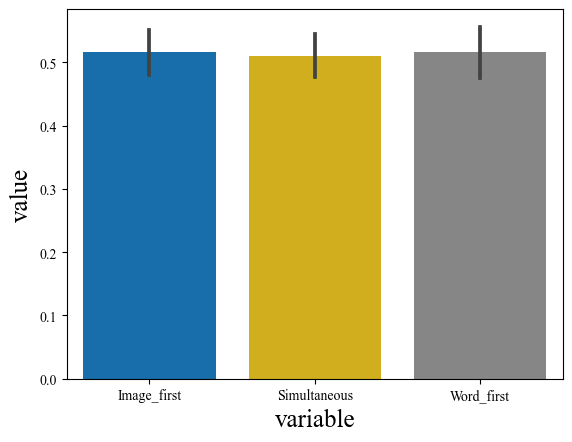

In [191]:
sns.barplot(x="variable", y = "value", data=T_2, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 3 back

In [192]:
roc_auc_img1_3 = []
roc_auc_word1_3 = []
roc_auc_sim1_3 = []

for train, test in logo.split(X1_sim3, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim3[train], y=y1_sim[train])
    y_pre_sim1_3 = logi1.predict_proba(X1_sim3[test])
    score_sim1_3 = roc_auc_score(y1_sim[test], y_pre_sim1_3[:, -1])
    y_pred_img_3 = logi1.predict_proba(X1_img3[df1_img["subj_idx"] == test_sub])
    score_img1_3 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_3[:, -1])
    y_pred_word_3 = logi1.predict_proba(X1_word3[df1_word["subj_idx"] == test_sub])
    score_word1_3 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_3[:, -1])
    roc_auc_sim1_3.append(score_sim1_3)
    roc_auc_img1_3.append(score_img1_3)
    roc_auc_word1_3.append(score_word1_3)

In [193]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_3))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_3))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_3))

The mean roc auc score of image_first is 0.512422324722728
The mean roc auc score of simultaneous is 0.5214410977126613
The mean roc auc score of word_first is 0.5159076549668484


In [194]:
T_3 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_3, "Simultaneous":roc_auc_sim1_3, "Word_first":roc_auc_word1_3, "Trial_back":3}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

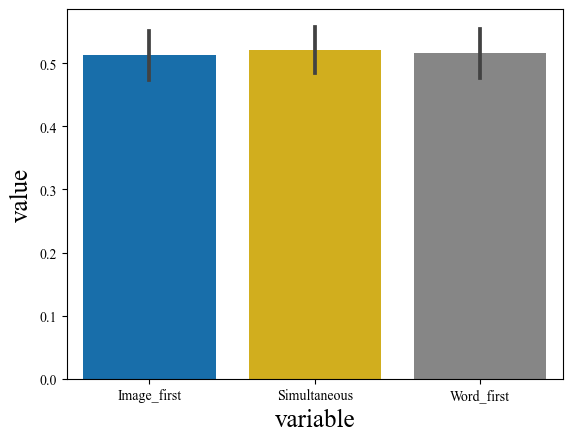

In [195]:
sns.barplot(x="variable", y = "value", data=T_3, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 4 back

In [196]:
roc_auc_img1_4 = []
roc_auc_word1_4 = []
roc_auc_sim1_4 = []

for train, test in logo.split(X1_sim4, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim4[train], y=y1_sim[train])
    y_pre_sim1_4 = logi1.predict_proba(X1_sim4[test])
    score_sim1_4 = roc_auc_score(y1_sim[test], y_pre_sim1_4[:, -1])
    y_pred_img_4 = logi1.predict_proba(X1_img4[df1_img["subj_idx"] == test_sub])
    score_img1_4 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_4[:, -1])
    y_pred_word_4 = logi1.predict_proba(X1_word4[df1_word["subj_idx"] == test_sub])
    score_word1_4 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_4[:, -1])
    roc_auc_sim1_4.append(score_sim1_4)
    roc_auc_img1_4.append(score_img1_4)
    roc_auc_word1_4.append(score_word1_4)

In [197]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_4))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_4))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_4))

The mean roc auc score of image_first is 0.5167337797749687
The mean roc auc score of simultaneous is 0.5163955209078266
The mean roc auc score of word_first is 0.5021507822067706


In [198]:
T_4 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_4, "Simultaneous":roc_auc_sim1_4, "Word_first":roc_auc_word1_4, "Trial_back":4}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

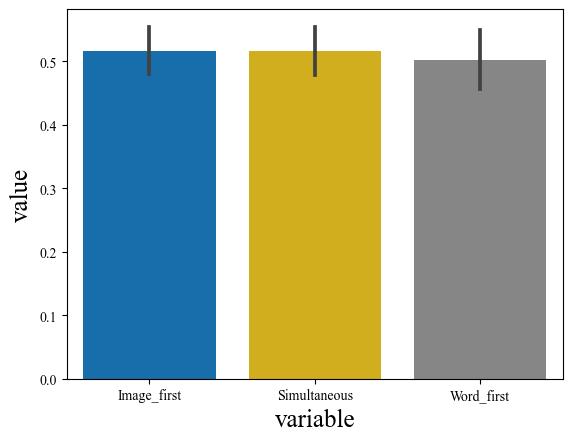

In [199]:
sns.barplot(x="variable", y = "value", data=T_4, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 5 back

In [200]:
roc_auc_img1_5 = []
roc_auc_word1_5 = []
roc_auc_sim1_5 = []

for train, test in logo.split(X1_sim5, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim5[train], y=y1_sim[train])
    y_pre_sim1_5 = logi1.predict_proba(X1_sim5[test])
    score_sim1_5 = roc_auc_score(y1_sim[test], y_pre_sim1_5[:, -1])
    y_pred_img_5 = logi1.predict_proba(X1_img5[df1_img["subj_idx"] == test_sub])
    score_img1_5 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_5[:, -1])
    y_pred_word_5 = logi1.predict_proba(X1_word5[df1_word["subj_idx"] == test_sub])
    score_word1_5 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_5[:, -1])
    roc_auc_sim1_5.append(score_sim1_5)
    roc_auc_img1_5.append(score_img1_5)
    roc_auc_word1_5.append(score_word1_5)

In [201]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_5))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_5))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_5))

The mean roc auc score of image_first is 0.49578282908198484
The mean roc auc score of simultaneous is 0.4979709889194212
The mean roc auc score of word_first is 0.5013203813113133


In [202]:
T_5 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_5, "Simultaneous":roc_auc_sim1_5, "Word_first":roc_auc_word1_5, "Trial_back":5}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

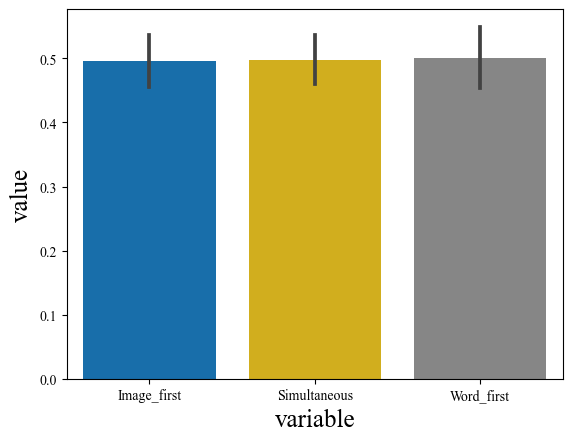

In [203]:
sns.barplot(x="variable", y = "value", data=T_5, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 6 back

In [204]:
roc_auc_img1_6 = []
roc_auc_word1_6 = []
roc_auc_sim1_6 = []

for train, test in logo.split(X1_sim6, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim6[train], y=y1_sim[train])
    y_pre_sim1_6 = logi1.predict_proba(X1_sim6[test])
    score_sim1_6 = roc_auc_score(y1_sim[test], y_pre_sim1_6[:, -1])
    y_pred_img_6 = logi1.predict_proba(X1_img6[df1_img["subj_idx"] == test_sub])
    score_img1_6 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_6[:, -1])
    y_pred_word_6 = logi1.predict_proba(X1_word6[df1_word["subj_idx"] == test_sub])
    score_word1_6 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_6[:, -1])
    roc_auc_sim1_6.append(score_sim1_6)
    roc_auc_img1_6.append(score_img1_6)
    roc_auc_word1_6.append(score_word1_6)

In [205]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_6))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_6))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_6))

The mean roc auc score of image_first is 0.5051263382847009
The mean roc auc score of simultaneous is 0.507449080137933
The mean roc auc score of word_first is 0.5082405647352821


In [206]:
T_6 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_6, "Simultaneous":roc_auc_sim1_6, "Word_first":roc_auc_word1_6, "Trial_back":6}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

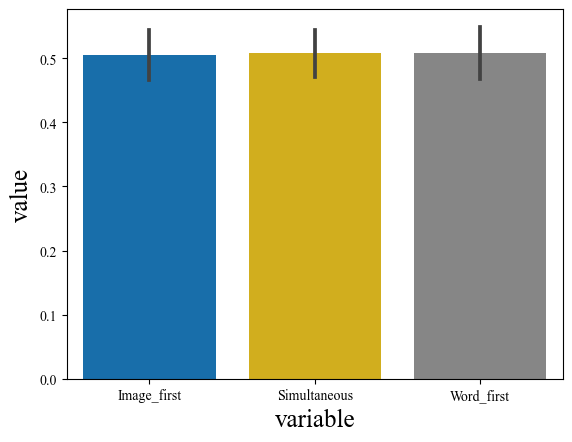

In [207]:
sns.barplot(x="variable", y = "value", data=T_6, palette=palette, 
            estimator=np.mean, errorbar='sd')

### 7 back

In [208]:
roc_auc_img1_7 = []
roc_auc_word1_7 = []
roc_auc_sim1_7 = []

for train, test in logo.split(X1_sim7, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))
    logi1.fit(X=X1_sim7[train], y=y1_sim[train])
    y_pre_sim1_7 = logi1.predict_proba(X1_sim7[test])
    score_sim1_7 = roc_auc_score(y1_sim[test], y_pre_sim1_7[:, -1])
    y_pred_img_7 = logi1.predict_proba(X1_img7[df1_img["subj_idx"] == test_sub])
    score_img1_7 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_7[:, -1])
    y_pred_word_7 = logi1.predict_proba(X1_word7[df1_word["subj_idx"] == test_sub])
    score_word1_7 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_7[:, -1])
    roc_auc_sim1_7.append(score_sim1_7)
    roc_auc_img1_7.append(score_img1_7)
    roc_auc_word1_7.append(score_word1_7)

In [209]:
print("The mean roc auc score of image_first is" , np.mean(roc_auc_img1_7))
print("The mean roc auc score of simultaneous is" , np.mean(roc_auc_sim1_7))
print("The mean roc auc score of word_first is" , np.mean(roc_auc_word1_7))

The mean roc auc score of image_first is 0.49763625916981946
The mean roc auc score of simultaneous is 0.5019293297441951
The mean roc auc score of word_first is 0.5111282101041601


In [210]:
T_7 = pd.melt(pd.DataFrame({"Image_first":roc_auc_img1_7, "Simultaneous":roc_auc_sim1_7, "Word_first":roc_auc_word1_7, "Trial_back":7}), id_vars=['Trial_back'])

<AxesSubplot: xlabel='variable', ylabel='value'>

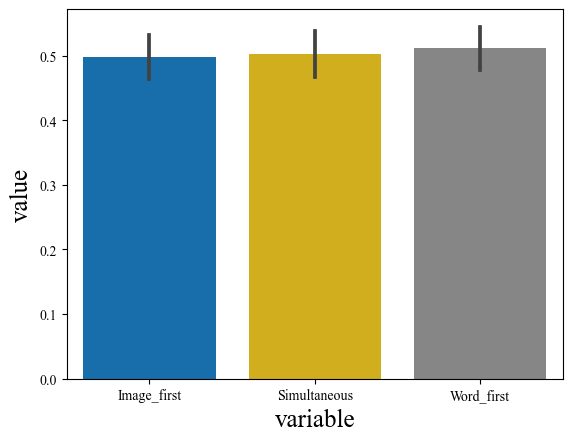

In [211]:
sns.barplot(x="variable", y = "value", data=T_7, palette=palette, 
            estimator=np.mean, errorbar='sd')

### Result

In [212]:
exp1_roc = pd.concat([T_0, T_1, T_2, T_3, T_4, T_5, T_6, T_7])

In [213]:
exp1_roc.groupby(['Trial_back', "variable"]).mean()['value']

Trial_back  variable    
0           Image_first     0.620118
            Simultaneous    0.618081
            Word_first      0.603321
1           Image_first     0.509775
            Simultaneous    0.503851
            Word_first      0.522770
2           Image_first     0.515650
            Simultaneous    0.510743
            Word_first      0.515530
3           Image_first     0.512422
            Simultaneous    0.521441
            Word_first      0.515908
4           Image_first     0.516734
            Simultaneous    0.516396
            Word_first      0.502151
5           Image_first     0.495783
            Simultaneous    0.497971
            Word_first      0.501320
6           Image_first     0.505126
            Simultaneous    0.507449
            Word_first      0.508241
7           Image_first     0.497636
            Simultaneous    0.501929
            Word_first      0.511128
Name: value, dtype: float64

In [214]:
groups_sim = df1_sim["subj_idx"].values
logo = LeaveOneGroupOut()

roc_auc_img1_0 = []
roc_auc_word1_0 = []
roc_auc_sim1_0 = []

roc_auc_img1_1 = []
roc_auc_word1_1 = []
roc_auc_sim1_1 = []

roc_auc_img1_2 = []
roc_auc_word1_2 = []
roc_auc_sim1_2 = []

roc_auc_img1_3 = []
roc_auc_word1_3 = []
roc_auc_sim1_3 = []

roc_auc_img1_4 = []
roc_auc_word1_4 = []
roc_auc_sim1_4 = []

roc_auc_img1_5 = []
roc_auc_word1_5 = []
roc_auc_sim1_5 = []

roc_auc_img1_6 = []
roc_auc_word1_6 = []
roc_auc_sim1_6 = []

roc_auc_img1_7 = []
roc_auc_word1_7 = []
roc_auc_sim1_7 = []



for train, test in logo.split(X1_sim, y1_sim, groups=groups_sim):
    test_sub = np.unique(groups_sim[test])[0]
    logi1 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(random_state=123))

    logi1.fit(X=X1_sim[train], y=y1_sim[train])

    y_pre_sim = logi1.predict_proba(X1_sim[test])
    score_sim1 = roc_auc_score(y1_sim[test], y_pre_sim[:, -1])
    y_pred_img = logi1.predict_proba(X1_img[df1_img["subj_idx"] == test_sub])
    score_img1 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img[:, -1])
    y_pred_word = logi1.predict_proba(X1_word[df1_word["subj_idx"] == test_sub])
    score_word1 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word[:, -1])

    y_pre_sim1_1 = logi1.predict_proba(X1_sim1[test])
    score_sim1_1 = roc_auc_score(y1_sim[test], y_pre_sim1_1[:, -1])
    y_pred_img_1 = logi1.predict_proba(X1_img1[df1_img["subj_idx"] == test_sub])
    score_img1_1 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_1[:, -1])
    y_pred_word_1 = logi1.predict_proba(X1_word1[df1_word["subj_idx"] == test_sub])
    score_word1_1 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_1[:, -1])


    y_pre_sim1_2 = logi1.predict_proba(X1_sim2[test])
    score_sim1_2 = roc_auc_score(y1_sim[test], y_pre_sim1_2[:, -1])
    y_pred_img_2 = logi1.predict_proba(X1_img2[df1_img["subj_idx"] == test_sub])
    score_img1_2 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_2[:, -1])
    y_pred_word_2 = logi1.predict_proba(X1_word2[df1_word["subj_idx"] == test_sub])
    score_word1_2 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_2[:, -1])


    y_pre_sim1_3 = logi1.predict_proba(X1_sim3[test])
    score_sim1_3 = roc_auc_score(y1_sim[test], y_pre_sim1_3[:, -1])
    y_pred_img_3 = logi1.predict_proba(X1_img3[df1_img["subj_idx"] == test_sub])
    score_img1_3 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_3[:, -1])
    y_pred_word_3 = logi1.predict_proba(X1_word3[df1_word["subj_idx"] == test_sub])
    score_word1_3 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_3[:, -1])
    
    y_pre_sim1_4 = logi1.predict_proba(X1_sim4[test])
    score_sim1_4 = roc_auc_score(y1_sim[test], y_pre_sim1_4[:, -1])
    y_pred_img_4 = logi1.predict_proba(X1_img4[df1_img["subj_idx"] == test_sub])
    score_img1_4 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_4[:, -1])
    y_pred_word_4 = logi1.predict_proba(X1_word4[df1_word["subj_idx"] == test_sub])
    score_word1_4 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_4[:, -1])


    y_pre_sim1_5 = logi1.predict_proba(X1_sim5[test])
    score_sim1_5 = roc_auc_score(y1_sim[test], y_pre_sim1_5[:, -1])
    y_pred_img_5 = logi1.predict_proba(X1_img5[df1_img["subj_idx"] == test_sub])
    score_img1_5 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_5[:, -1])
    y_pred_word_5 = logi1.predict_proba(X1_word5[df1_word["subj_idx"] == test_sub])
    score_word1_5 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_5[:, -1])

    y_pre_sim1_6 = logi1.predict_proba(X1_sim6[test])
    score_sim1_6 = roc_auc_score(y1_sim[test], y_pre_sim1_6[:, -1])
    y_pred_img_6 = logi1.predict_proba(X1_img6[df1_img["subj_idx"] == test_sub])
    score_img1_6 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_6[:, -1])
    y_pred_word_6 = logi1.predict_proba(X1_word6[df1_word["subj_idx"] == test_sub])
    score_word1_6 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_6[:, -1])

    y_pre_sim1_7 = logi1.predict_proba(X1_sim7[test])
    score_sim1_7 = roc_auc_score(y1_sim[test], y_pre_sim1_7[:, -1])
    y_pred_img_7 = logi1.predict_proba(X1_img7[df1_img["subj_idx"] == test_sub])
    score_img1_7 = roc_auc_score(y1_img[df1_img["subj_idx"] == test_sub], y_pred_img_7[:, -1])
    y_pred_word_7 = logi1.predict_proba(X1_word7[df1_word["subj_idx"] == test_sub])
    score_word1_7 = roc_auc_score(y1_word[df1_word["subj_idx"] == test_sub], y_pred_word_7[:, -1])

    
    roc_auc_sim1_0.append(score_sim1)
    roc_auc_img1_0.append(score_img1)
    roc_auc_word1_0.append(score_word1)

    roc_auc_sim1_1.append(score_sim1_1)
    roc_auc_img1_1.append(score_img1_1)
    roc_auc_word1_1.append(score_word1_1)

    roc_auc_sim1_2.append(score_sim1_2)
    roc_auc_img1_2.append(score_img1_2)
    roc_auc_word1_2.append(score_word1_2)

    roc_auc_sim1_3.append(score_sim1_3)
    roc_auc_img1_3.append(score_img1_3)
    roc_auc_word1_3.append(score_word1_3)

    roc_auc_sim1_4.append(score_sim1_4)
    roc_auc_img1_4.append(score_img1_4)
    roc_auc_word1_4.append(score_word1_4)

    roc_auc_sim1_5.append(score_sim1_5)
    roc_auc_img1_5.append(score_img1_5)
    roc_auc_word1_5.append(score_word1_5)

    roc_auc_sim1_6.append(score_sim1_6)
    roc_auc_img1_6.append(score_img1_6)
    roc_auc_word1_6.append(score_word1_6)

    roc_auc_sim1_7.append(score_sim1_7)
    roc_auc_img1_7.append(score_img1_7)
    roc_auc_word1_7.append(score_word1_7)